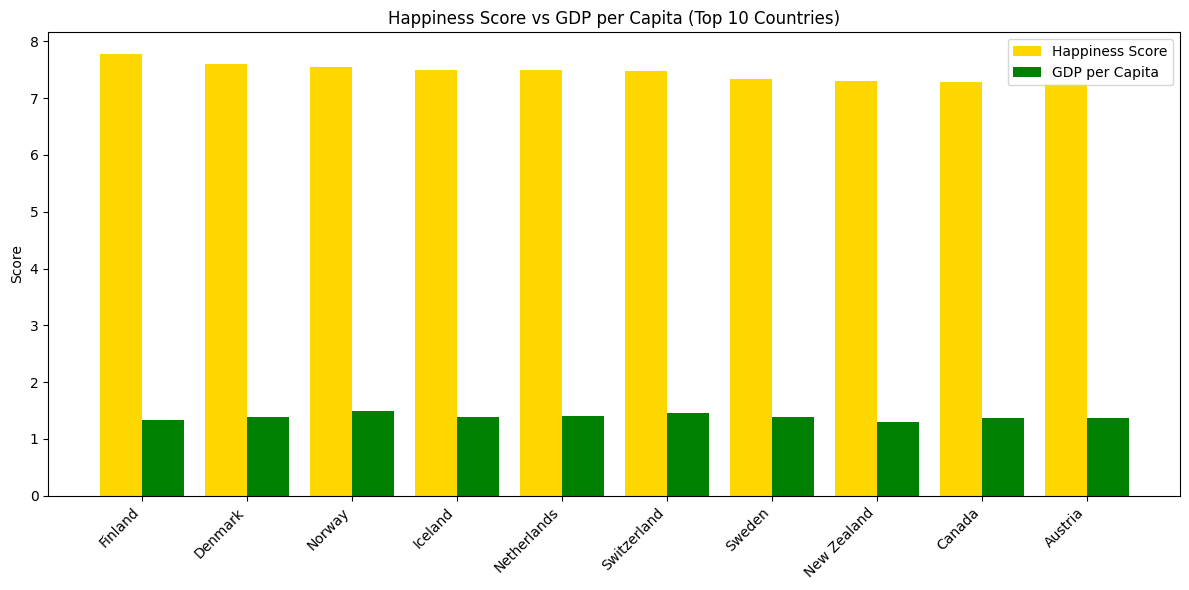

In [1]:
import numpy as np
import pylab as plt
import random, datetime
import statsmodels.api as sm
from scipy.stats import norm
#% matplotlib inline

file_path = "2019.csv"
countries = np.genfromtxt(file_path, delimiter=",", dtype=str, skip_header=1, usecols=1)

data = np.genfromtxt(file_path, delimiter=",", skip_header=1, usecols=(2, 3))

happiness_scores = data[:, 0]
gdp_per_capita = data[:, 1]

top_indices = np.argsort(happiness_scores)[-10:][::-1]

top_countries = countries[top_indices]
top_happiness = happiness_scores[top_indices]
top_gdp = gdp_per_capita[top_indices]

fig, ax = plt.subplots(figsize=(12, 6))
width = 0.4
x = np.arange(len(top_countries))

ax.bar(x, top_happiness, width=width, label="Happiness Score", color="gold")
ax.bar(x + width, top_gdp, width=width, label="GDP per Capita", color="green")

ax.set_xticks(x + width / 2)
ax.set_xticklabels(top_countries, rotation=45, ha="right")
ax.set_ylabel("Score")
ax.set_title("Happiness Score vs GDP per Capita (Top 10 Countries)")
ax.legend()

plt.tight_layout()
plt.show()

In [37]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("2019.csv")

df = df.rename(columns={
    "Country or region": "Country",
    "Score": "Happiness Score"
})

fig = px.choropleth(df,
                    locations="Country",
                    locationmode="country names",
                    color="Happiness Score",
                    color_continuous_scale="Viridis",
                    range_color=(2.85, 7.77),
                    title="World Happiness Scores by Country (2019)")

fig.update_layout(
    title_x=0.5,
    geo=dict(showframe=False, showcoastlines=False),
    margin=dict(l=0, r=0, t=50, b=0)
)


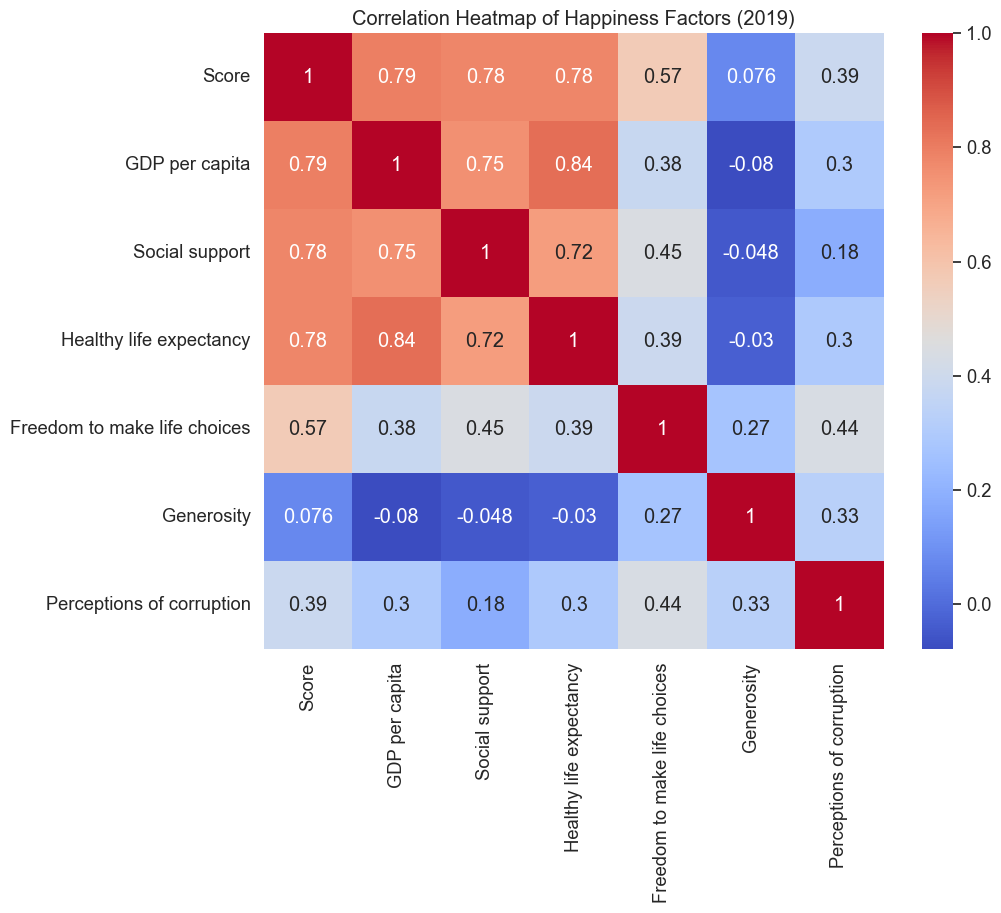

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("2019.csv")
corr = df.drop(columns=["Country or region", "Overall rank"]).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Happiness Factors (2019)")
plt.show()

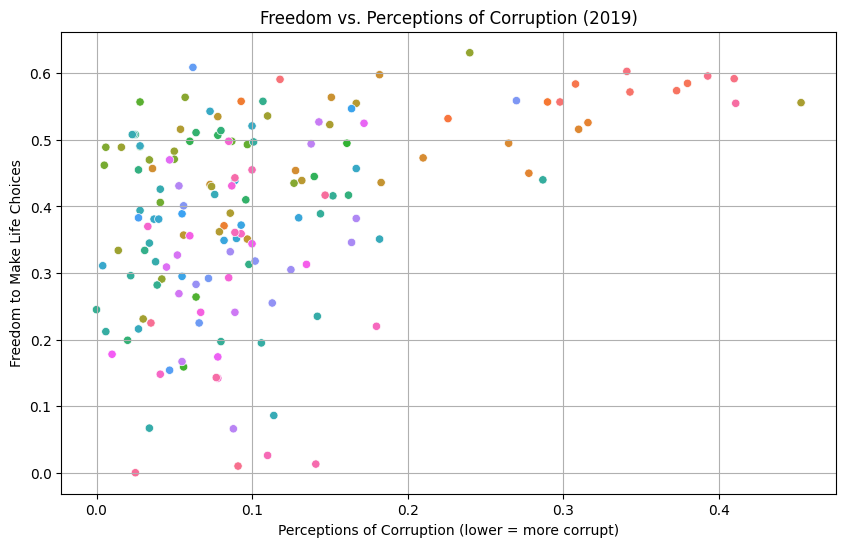

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("2019.csv")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x="Perceptions of corruption", 
                y="Freedom to make life choices", 
                hue="Country or region", 
                legend=False)

plt.title("Freedom vs. Perceptions of Corruption (2019)")
plt.xlabel("Perceptions of Corruption (lower = more corrupt)")
plt.ylabel("Freedom to Make Life Choices")
plt.grid(True)

plt.show()

In [11]:
import plotly.express as px

fig = px.scatter(df,
                 x="Social support",
                 y="Score",
                 color="Freedom to make life choices",
                 size="Healthy life expectancy",
                 hover_name="Country or region",
                 color_continuous_scale="Viridis",
                 title="Happiness vs. Social Support (2019)")



fig.update_layout(height=600)
fig.show()

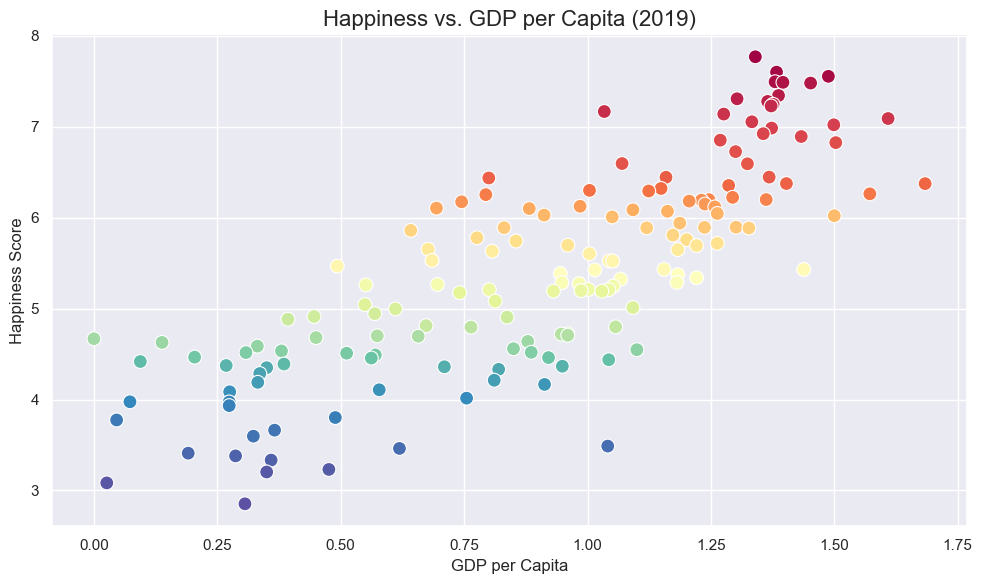

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("2019.csv")

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df,
                x="GDP per capita",
                y="Score",
                hue="Country or region",
                palette="Spectral",
                legend=False,
                s=100)


plt.title("Happiness vs. GDP per Capita (2019)", fontsize=16)
plt.xlabel("GDP per Capita", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.tight_layout()
plt.show()